In [1]:
#Import Packages
import pandas.io.sql
import numpy as np
import pymssql
import pyodbc
import datetime
from flask import Flask, g, render_template, abort, request
import json

# Establish Connection with SQL Server

In [2]:
#Connection String to SQL Server via pymssql
conn = pymssql.connect(host='****', user='****', password='****', database='****')

#Alternate Connection String using pyodbc - this has a driver error - not sure why because it works in PyCharm
#conn2 = 'Driver={ODBC Driver 17 for SQL Server};Server=129.123.41.19;Database=Melaleuca;Uid=joshdustin;Pwd=bigroupM2k18;'

In [3]:
#View all rows from the table Murder Data
sqlALL = """
SELECT *
    FROM [Melaleuca].[dbo].[MurderData]
"""

In [4]:
#Ready SQL Query and show top five rows
df = pandas.io.sql.read_sql(sqlALL, conn)
df.head()

,RecordID,AgencyCode,AgencyName,AgencyType,City,State,Year,Month,Incident,CrimeType,...,Relationship,Weapon,VictimCount,PerpetratorCount,RecordSource,GeneralWeapon,VictimGeneration,PerpGeneration,VictimBirthYear,PerpBirthYear
0,502704.0,CT00015,Bridgeport,Municipal Police,Fairfield,Connecticut,2006.0,September,2.0,Murder or Manslaughter,...,Unknown,Handgun,2.0,0.0,FBI,Gun,GenX,GenX,1968.0,1965.0
1,502705.0,CT00015,Bridgeport,Municipal Police,Fairfield,Connecticut,2006.0,January,1.0,Murder or Manslaughter,...,Unknown,Firearm,0.0,0.0,FBI,Gun,BabyBoomers,Other,1961.0,NaN
2,502706.0,CT00015,Bridgeport,Municipal Police,Fairfield,Connecticut,2006.0,January,2.0,Murder or Manslaughter,...,Unknown,Handgun,0.0,0.0,FBI,Gun,GenX,Other,1977.0,NaN
3,502707.0,CT00015,Bridgeport,Municipal Police,Fairfield,Connecticut,2006.0,February,1.0,Murder or Manslaughter,...,Unknown,Knife,0.0,0.0,FBI,Knife,BabyBoomers,Other,1947.0,NaN
4,502708.0,CT00015,Bridgeport,Municipal Police,Fairfield,Connecticut,2006.0,March,1.0,Murder or Manslaughter,...,Unknown,Handgun,0.0,0.0,FBI,Gun,Millennials,Other,1986.0,NaN


In [5]:
# View the last five records of the dataset
df.tail()

,RecordID,AgencyCode,AgencyName,AgencyType,City,State,Year,Month,Incident,CrimeType,...,Relationship,Weapon,VictimCount,PerpetratorCount,RecordSource,GeneralWeapon,VictimGeneration,PerpGeneration,VictimBirthYear,PerpBirthYear
638449,55892.0,MS07501,Vicksburg,Municipal Police,Warren,Mississippi,1982.0,March,2.0,Murder or Manslaughter,...,Husband,Blunt Object,0.0,0.0,FBI,Blunt Object,GreatestGen,GreatestGen,1910.0,1919.0
638450,55893.0,MS07501,Vicksburg,Municipal Police,Warren,Mississippi,1982.0,May,1.0,Murder or Manslaughter,...,In-Law,Handgun,0.0,0.0,FBI,Gun,BabyBoomers,BabyBoomers,1957.0,1950.0
638451,55894.0,MS07600,Washington,Sheriff,Washington,Mississippi,1982.0,January,1.0,Murder or Manslaughter,...,Brother,Rifle,0.0,0.0,FBI,Gun,GenX,GenX,1965.0,1966.0
638452,55895.0,MS07600,Washington,Sheriff,Washington,Mississippi,1982.0,February,1.0,Murder or Manslaughter,...,Brother,Handgun,0.0,0.0,FBI,Gun,Silent,Silent,1945.0,1942.0
638453,55896.0,MS07600,Washington,Sheriff,Washington,Mississippi,1982.0,March,1.0,Murder or Manslaughter,...,Acquaintance,Handgun,0.0,0.0,FBI,Gun,BabyBoomers,Silent,1963.0,1945.0


# Analyze Total Homicide Trends from 2000 to 2014

In [6]:
#Select the columns you want to plot on the Age Table
HomicidesByYear = """
SELECT [Year], COUNT([RecordID]) as TotalHomicides
    FROM [Melaleuca].[dbo].[MurderData]
GROUP BY [YEAR]
HAVING [Year] > 1999
ORDER BY [Year]
"""

In [7]:
#View Total Homicides by Year
df2 = pandas.io.sql.read_sql(HomicidesByYear, conn, index_col='Year')
df2.head()

,TotalHomicides
Year,
2000.0,14671
2001.0,15803
2002.0,16268
2003.0,16512
2004.0,16233


In [8]:
#Show the data types
df2.dtypes

TotalHomicides    int64
dtype: object

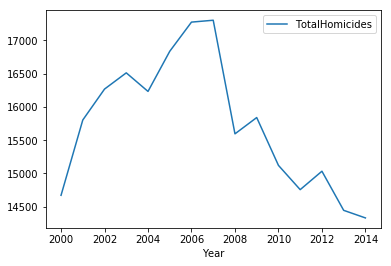

In [9]:
# Plot Homicides By Year between 2009 and 2014
%matplotlib inline
df2.plot()

# Analyse Total Kills by Generation (1980 - 2014)

In [10]:
#SQL Query
TotalKillsbyGen = """
SELECT PerpGeneration, COUNT([RecordID]) as TotalKills
	FROM [Melaleuca].[dbo].[MurderData]
GROUP BY PerpGeneration
ORDER BY COUNT([RecordID])
"""

In [11]:
#View the output
df3 = pandas.io.sql.read_sql(TotalKillsbyGen, conn, index_col='PerpGeneration')
df3.head()

,TotalKills
PerpGeneration,
Post Millennials,1064
GreatestGen,10599
Silent,36096
Millennials,69182
BabyBoomers,152112


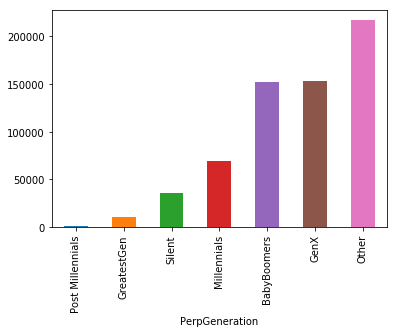

In [12]:
# Create bar graph
df3['TotalKills'].plot.bar()

In [13]:
#Show the generation with the most kills during the time period
print("Generation with the most kills")
df3.sort_values(by='TotalKills', ascending=False)

Generation with the most kills


,TotalKills
PerpGeneration,
Other,216563
GenX,152838
BabyBoomers,152112
Millennials,69182
Silent,36096
GreatestGen,10599
Post Millennials,1064


# Analyze Killed by Generation (1980 - 2014)

In [14]:
#SQL Query
TotalKilledbyGen = """
SELECT VictimGeneration, COUNT([RecordID]) as TotalKilled
	FROM [Melaleuca].[dbo].[MurderData]
GROUP BY VictimGeneration
ORDER BY COUNT([RecordID])
"""

In [15]:
#View the output
df4 = pandas.io.sql.read_sql(TotalKilledbyGen, conn, index_col='VictimGeneration')
df4.head()

,TotalKilled
VictimGeneration,
Post Millennials,8850
Other,17301
GreatestGen,33043
Silent,64170
Millennials,94028


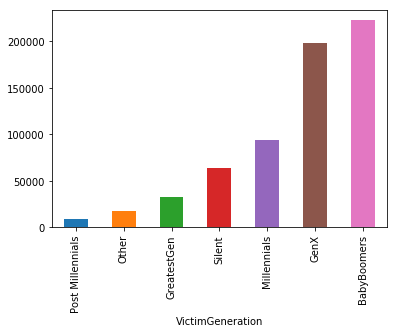

In [16]:
# Create bar graph
df4['TotalKilled'].plot.bar()

# Analyze Kills by Month (1980 - 2014)

In [17]:
#SQL Query
KillsbyMonth = """
SELECT Month, COUNT([RecordID]) as Homicides
	FROM [Melaleuca].[dbo].[MurderData]
GROUP BY Month
ORDER BY COUNT([RecordID])
"""

In [18]:
#View the output
df5 = pandas.io.sql.read_sql(KillsbyMonth, conn, index_col='Month')
df5.head()

,Homicides
Month,
February,46079
November,50016
April,51209
March,51444
January,52928


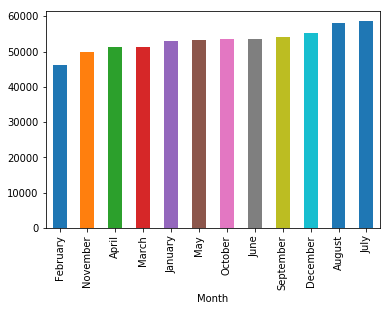

In [19]:
# Create bar graph
df5['Homicides'].plot.bar()

# Kills by State (1980 - 2014)

In [20]:
#SQL Query
KillsbyState = """
SELECT TOP 10 [State], COUNT([RecordID]) as Homicides
	FROM [Melaleuca].[dbo].[MurderData]
GROUP BY [State]
ORDER BY COUNT([RecordID]) desc
"""

#View the output
df6 = pandas.io.sql.read_sql(KillsbyState, conn, index_col='State')
df6.head()

,Homicides
State,
California,99783
Texas,62095
New York,49268
Florida,37164
Michigan,28448


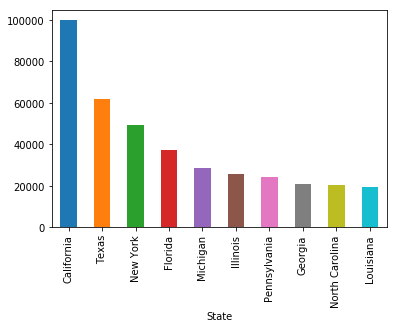

In [21]:
# Create bar graph
df6['Homicides'].plot.bar()

# Analyze Weapon Types (1980 - 2014)

In [22]:
#SQL Query
WeaponFemale = """
SELECT [GeneralWeapon], COUNT([RecordID]) as Homicides
	FROM [Melaleuca].[dbo].[MurderData]
    WHERE PerpetratorSex = 'Female'
GROUP BY [GeneralWeapon]
ORDER BY COUNT([RecordID]) desc
"""

WeaponMale = """
SELECT [GeneralWeapon], COUNT([RecordID]) as Homicides
	FROM [Melaleuca].[dbo].[MurderData]
    WHERE PerpetratorSex = 'Male'
GROUP BY [GeneralWeapon]
ORDER BY COUNT([RecordID]) desc
"""

In [23]:
#Define data for female weapon type
df7 = pandas.io.sql.read_sql(WeaponFemale, conn, index_col='GeneralWeapon')

#Define data for female weapon type
df8 = pandas.io.sql.read_sql(WeaponMale, conn, index_col='GeneralWeapon')

Female Preferred Weapon Type


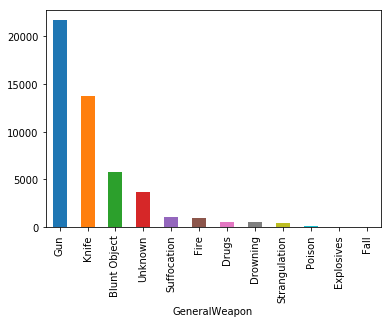

In [24]:
# Create bar chart for female weapon type
print('Female Preferred Weapon Type')
df7['Homicides'].plot.bar()

Male Preferred Weapon Type


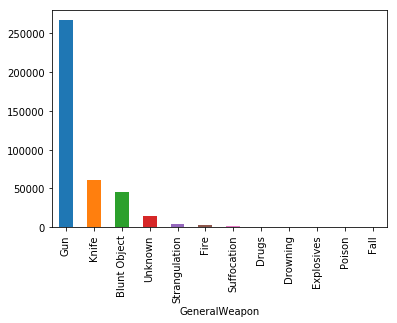

In [25]:
# Create bar chart for male weapon type
print('Male Preferred Weapon Type')
df8['Homicides'].plot.bar()

# Analyze Kills by Sex (1980 - 2014)

In [26]:
#SQL Query
KillsbySex = """
SELECT	[Year],                   
		[Male] AS [MaleKills], 
		[Female] AS [FemaleKills]
	FROM (SELECT [Year], PerpetratorSex, RecordID 
			FROM [Melaleuca].[dbo].[MurderData]) as mur 
PIVOT (COUNT([RecordID]) FOR PerpetratorSex IN ([Male],[Female])) AS pvt
ORDER BY [Year]
"""

In [27]:
df9 = pandas.io.sql.read_sql(KillsbySex, conn, index_col='Year')
df9.head()

,MaleKills,FemaleKills
Year,,
1980.0,14398,2331
1981.0,13580,2208
1982.0,12947,2113
1983.0,12408,2107
1984.0,11446,1799


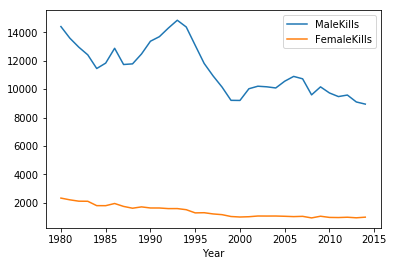

In [28]:
%matplotlib inline
df9.plot()

# Learn More About the Data

In [37]:
#Data 2000 - 2014
sql2000 = """
SELECT *
    FROM [Melaleuca].[dbo].[MurderData]
    WHERE [Year] > 1999
"""

In [38]:
df10 = pandas.io.sql.read_sql(sql2000, conn)

In [39]:
# Get general information on the dataset
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236022 entries, 0 to 236021
Data columns (total 29 columns):
RecordID                236022 non-null float64
AgencyCode              236022 non-null object
AgencyName              236022 non-null object
AgencyType              236022 non-null object
City                    236022 non-null object
State                   236022 non-null object
Year                    236022 non-null float64
Month                   236022 non-null object
Incident                236022 non-null float64
CrimeType               236022 non-null object
CrimeSolved             236022 non-null object
VictimSex               236022 non-null object
VictimAge               232647 non-null float64
VictimRace              236022 non-null object
VictimEthnicity         236022 non-null object
PerpetratorSex          236022 non-null object
PerpetratorAge          151583 non-null float64
PerpetratorRace         236022 non-null object
PerpetratorEthnicity    236022 non-nul

In [40]:
#Define current time
now = datetime.datetime.now()
print(now)

2018-12-12 16:03:32.133398


In [41]:
#Find the birth year of the oldest perpetrator in the dataset
OldestPerp = df['PerpBirthYear'].min()

In [42]:
#Now show the age of the oldest perpetrator in the dataset
print(now.year-OldestPerp)

137.0


In [43]:
#View all unique Perpetrator Generations
df['PerpGeneration'].unique()

array(['GenX', 'Other', 'BabyBoomers', 'Millennials', 'Silent',
       'GreatestGen', 'Post Millennials'], dtype=object)

In [66]:
#Alternative way to view unique values
for x in df['PerpGeneration'].unique():
    print(x)

GenX
Millennials
BabyBoomers
Post Millennials
Silent
Other
GreatestGen


In [44]:
# Describe the Victim Generation column. The most common value is Millennials with 30,685 entries.
print(df['VictimGeneration'].describe())

count          638454
unique              7
top       BabyBoomers
freq           222792
Name: VictimGeneration, dtype: object


# Use Flask to Expose Data

In [ ]:
app = Flask(__name__)
app.config.from_object(__name__)


@app.before_request
def before_request():
    try:
        g.sql_conn = pymssql.connect(host='****', user='****', password='****', database='****')
    except Exception:
        abort(500, "No database connection could be established.")


@app.teardown_request
def teardown_request(exception):
    try:
        g.sql_conn.close()
    except AttributeError:
        pass

#Home page text
@app.route("/")
def hello():
    return "Josh Dustin ----- MIS 5400 Python Project ----- U.S. Homicide Data"

#TestGraphic
#@app.route("/test")
#def testgraphic():
#    curs = g.sql_conn.cursor()
#    KillsbyState = curs.execute("SELECT TOP 10 [State], COUNT([RecordID]) as Homicides FROM [Melaleuca].[dbo].[MurderData] GROUP BY [State] ORDER BY COUNT([RecordID]) desc")
#    df6 = pandas.io.sql.read_sql(KillsbyState, conn, index_col='State')
#    return df6['Homicides'].plot.bar()

#Show All Data
@app.route('/item', methods=['GET'])
def get_mel_data():
    curs = g.sql_conn.cursor()
    curs.execute("select TOP 100 * from Melaleuca.dbo.MurderData")

    columns = [column[0] for column in curs.description]
    data = []

    for row in curs.fetchall():
        data.append(dict(zip(columns, row)))

    return json.dumps(data, indent=4, sort_keys=True, default=str)


# GET Data for single Record ID
@app.route('/item/<string:id>', methods=['GET'])
def get_singleitem(id):
    curs = g.sql_conn.cursor()
    curs.execute("select * from Melaleuca.dbo.MurderData where RecordID = ?", id)

    columns = [column[0] for column in curs.description]
    data = []

    for row in curs.fetchall():
        data.append(dict(zip(columns, row)))

    return json.dumps(data, indent=4, sort_keys=True, default=str)

if __name__ == '__main__':
    app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
